<a href="https://colab.research.google.com/github/gorselli14/Portifolio_Projetos/blob/master/An%C3%A1lise_dos_dados_do_Airbnb_(Londres).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exercício do Curso de Data Science**
by [Gabriel Orselli](https://www.linkedin.com/in/gabriel-veras-orselli-5a005824)

---
#Analise dos dados do Airbnb - Londres
O [Airbnb](https://www.airbnb.com) é considera a *maior empresa hoteleira da atualizade*, mesmo sem possuir um único hotel!

A plataforma surgiu da ideia de conectar pessoas que querem viajar , com pessoas que querem alugar imóveis. O Airbnb então criou uma plataforma inovadora que traz a praticidade para fazer isso acontecer.

No final de 2018, o Airbnb já havia **hospedado mais de 300 milhões** de pessoas por todo o mundo. Se tornando uma pedra no sapato das redes hoteleiras.

Uma das iniciativas do Airbnb é disponibilizar dados, através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), para contribuir com projetos de *Data Science*.


## Obtenção dos dados para análise

Todos os dados usados nesse projeto foram obtidos a partir do portar [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para essa análise utilizarei o seguinte arquivo:
* `listing.csv` - *Summary information and metrics for listings in London (good for visualisations).*

In [0]:
#importação dos pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [0]:
# importando arquivo listing.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-kingdom/england/london/2020-05-10/visualisations/listings.csv")

## Análise dos dados

Essa etapa tem o objetivo de fazer uma análise inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


In [6]:
#mostrar as primeiras 5 entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,65,1,21,2020-02-22,0.18,3,361
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,100,10,89,2020-03-16,0.70,1,256
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,300,3,42,2019-11-02,0.38,15,330
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,360
4,25023,All-comforts 2-bed flat near Wimbledon tennis,102813,Amanda,NaN,Wandsworth,51.44687,-0.21874,Entire home/apt,65,21,35,2020-03-30,0.69,1,42


### **Q1. Quantos atributos e quantas entradas existem nesse conjunto de dados? Quais os tipos de variáveis?**

Vou analisar a quantidade de entradas existentes no conjuntos de dados e identificar os tipos das variáveis em cada coluna.

O *dataset* utilizado nessa análise é a versão resumida. Existem outros arquivos mais completos dentro do portal do Airbnb

In [17]:
# identificar o volume de dados do DataFrame
print(f'Qtd de entradas:\t {df.shape[0]}')
print(f'Qtd de variáveis:\t {df.shape[1]}\n')

#verificar os tipos de variáveis em cada coluna
display(df.dtypes)

Qtd de entradas:	 85207
Qtd de variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual o percentual de valores ausentes no *dataset*?**

A qualidade de um *dataset* está relacionada à quantidade de valores ausentes e é importante logo no início idenficar se esses valores nulos são significativos dentro do total de entradas.

* É possível identificar que a coluna `neighbourhood_group` possui 100% dos valores auzentes.
* As variáveis `reviews_per_month` e `last_review` estão com 25% dos valores nulos
* As variáveis `host_name` e `host_name` estão com percentual de valores nulos inferior a 0,1%


In [36]:
# identificar o percentual de valores ausentes e ordená-los em ordem decrescente
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  25.159905
last_review                        25.159905
host_name                           0.032861
name                                0.028167
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis usarei o modelo de histograma abaixo.

Histograma sem Outliers


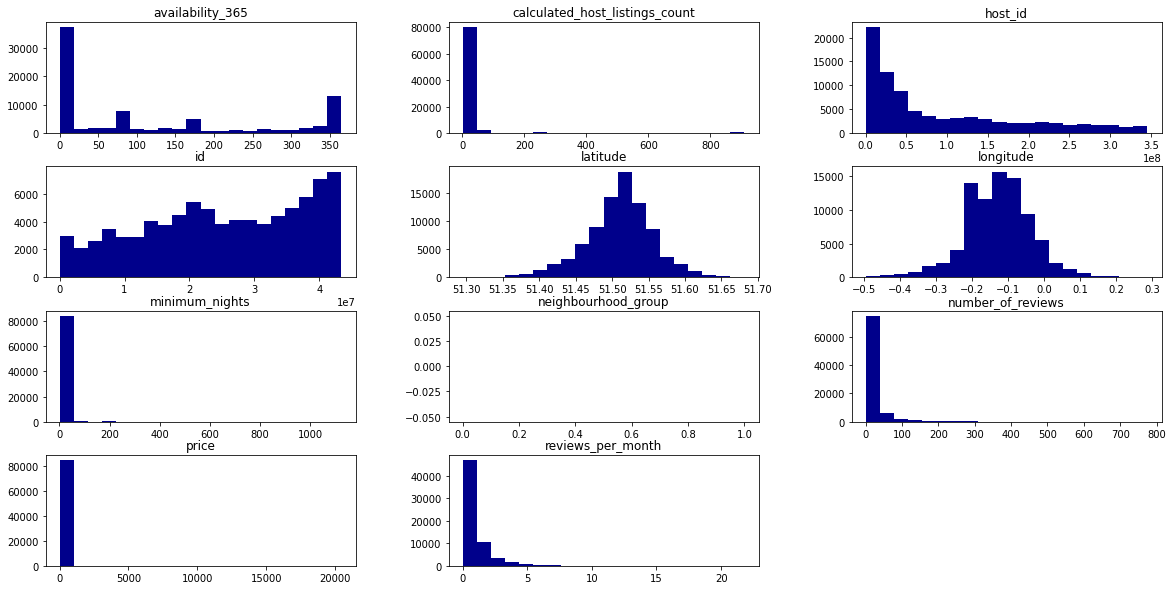

In [78]:
# plotar o histograma de variáveis numéricas sem exclusão dos Outliers
print('Histograma sem Outliers')
df.hist(bins=20, figsize=(20,10), color='darkblue', grid=False,);

### **Q4. Existem *outliers* presentes nesse *dataset*?***

Se analisarmos o histograma gerado para as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`, podemos identificar indícios da presença de *outliers*.

Nessas variáveis existem valores que não seguem uma distribuição e distorcem toda a representação gráfica.

Existem duas maneiras para confirmar e identificar os *outliers*. São elas:
* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável


In [86]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,85207.000000,85207.000000,85207.000000,63769.000000,85207.000000,85207.000000
mean,128.951800,4.593437,17.284179,0.877056,20.224477,122.478975
std,306.939736,19.667718,37.170766,1.090839,98.070548,139.290122
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,46.000000,1.000000,0.000000,0.180000,1.000000,0.000000
50%,81.000000,2.000000,4.000000,0.500000,1.000000,74.000000
75%,140.000000,3.000000,17.000000,1.150000,5.000000,251.000000
max,20471.000000,1125.000000,775.000000,21.810000,910.000000,365.000000


Analisando o resumo estatístico acima, podemos identificar alguns *outliers*:
* A variável `price` possui 75% dos valores abaixo de £140, porém o maior valor dessa variável é  £20.471;
* O maior valor da variável `minimum_nights`, que representa o número mínimo de noites que o anfitrião aceita alugar o imóvel, é igual a 1125 dias;
* O maior valor da variável `calculated_host_listings_count`, que representa a quantidade de imóveis de um mesmo anfitrião é igual a 910.

#### Boxplot para a variável `minimum_nights`

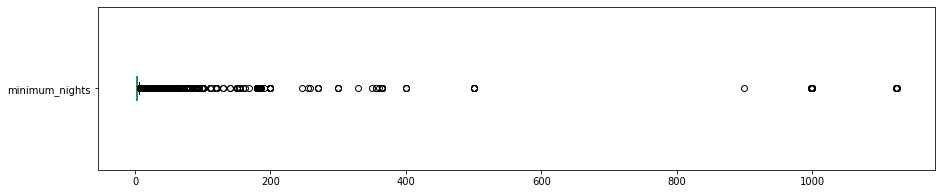

Valores acima de 30 dias:
1039 entradas
Que representa 1.2194%


In [110]:
# Boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.show()
# Valores acima de 30 dias para minimum_nights
print('Valores acima de 30 dias:')
print(f'{len(df[df.minimum_nights>30])} entradas')
print(f'Que representa {(len(df [df.minimum_nights > 30])/df.shape[0])*100:.4f}%')